### MovieLens 1M Dataset

In [2]:
import pandas as pd
pd.options.display.max_rows=10

In [20]:
unames=['user_id', 'gender', 'age', 'occupation', 'zip']
users=pd.read_table('users.dat', sep='::', header=None, names=unames, engine='python')
rnames=['user_id', 'movie_id', 'rating', 'timestamp']
ratings=pd.read_table('ratings.dat', sep='::', header=None, names=rnames, engine='python')
mnames=['movie_id', 'title', 'genres']
movies=pd.read_table('movies.dat', sep='::', header=None, names=mnames, engine='python')

In [77]:
data=ratings.merge(users).merge(movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [83]:
# To get mean movie ratings for each film grouped by gender, we can use the pivot_table method
mean_ratings=data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [87]:
# filter down to movies that received at least 250 ratings
ratings_by_title=data.groupby('title').size()
active_titles=ratings_by_title.index[ratings_by_title>=250]
# select rows on the index
mean_ratings=mean_ratings.loc[active_titles]
# To see the top films among female viewers, we can sort by the F column in descending order
top_female_ratings=mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


#### Measuring Rating Disagreement

In [90]:
mean_ratings['diff']=mean_ratings['M']-mean_ratings.F
sorted_by_diff=mean_ratings.sort_values(by='diff')
# reverse the order of the rows
sorted_by_diff[::-1]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
...,...,...,...
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Little Women (1994),3.870588,3.321739,-0.548849
Grease (1978),3.975265,3.367041,-0.608224


In [94]:
# the movies that elicited the most disagreement among viewers, independent of gender indentification
rating_std_by_title=data.groupby('title')['rating'].std()
rating_std_by_title=rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### US Baby Names 1880-2010

In [97]:
names1880=pd.read_csv('babynames/yob1880.txt', names=['name', 'sex', 'births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [101]:
# Since the dataset is split into files by yaer, one of the first things to do is to assemble all of 
# the data into a single DataFrame and further add a year field
years=range(1880, 2011)
pieces=[]
columns=['name', 'sex', 'births']
for year in years:
    path='babynames/yob%d.txt' % year
    frame=pd.read_csv(path, names=columns)
    frame['year']=year
    pieces.append(frame)
# Concatenate everything into a single DataFrame
names=pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [102]:
total_births=names.pivot_table('births', index='year', columns='sex', aggfunc='sum')
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<IPython.core.display.Javascript object>


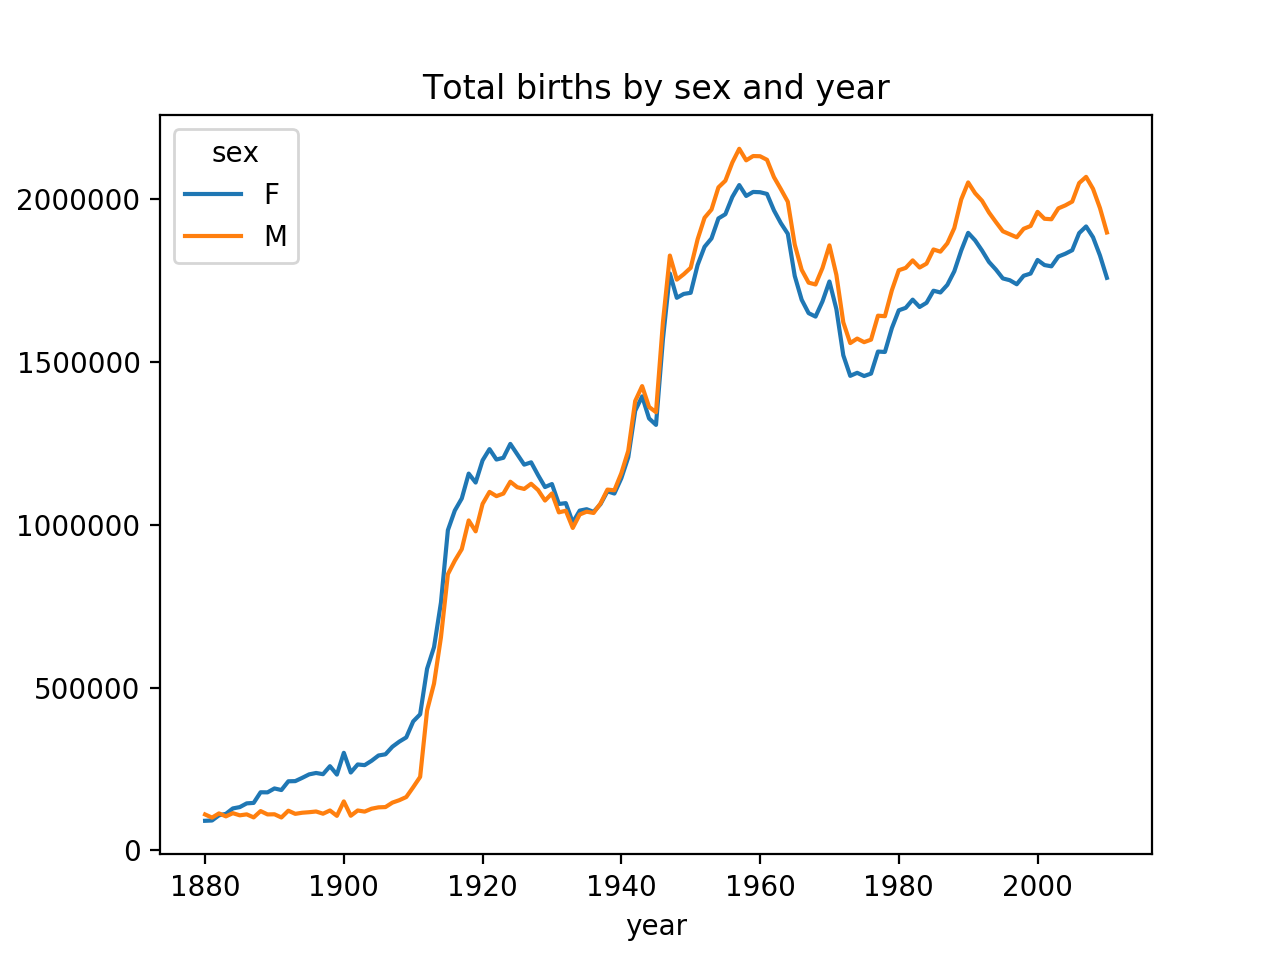

In [105]:
%matplotlib notebook
total_births.plot(title='Total births by sex and year')

In [106]:
# let's insert a column prop with the fraction of babies given each name relative to the total number of births
def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group
names=names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [109]:
# the top 1000 names for each sex/year combination
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped=names.groupby(['year', 'sex'])
top1000=grouped.apply(get_top1000)
# drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

#### Analyzing Naming Trends

<IPython.core.display.Javascript object>


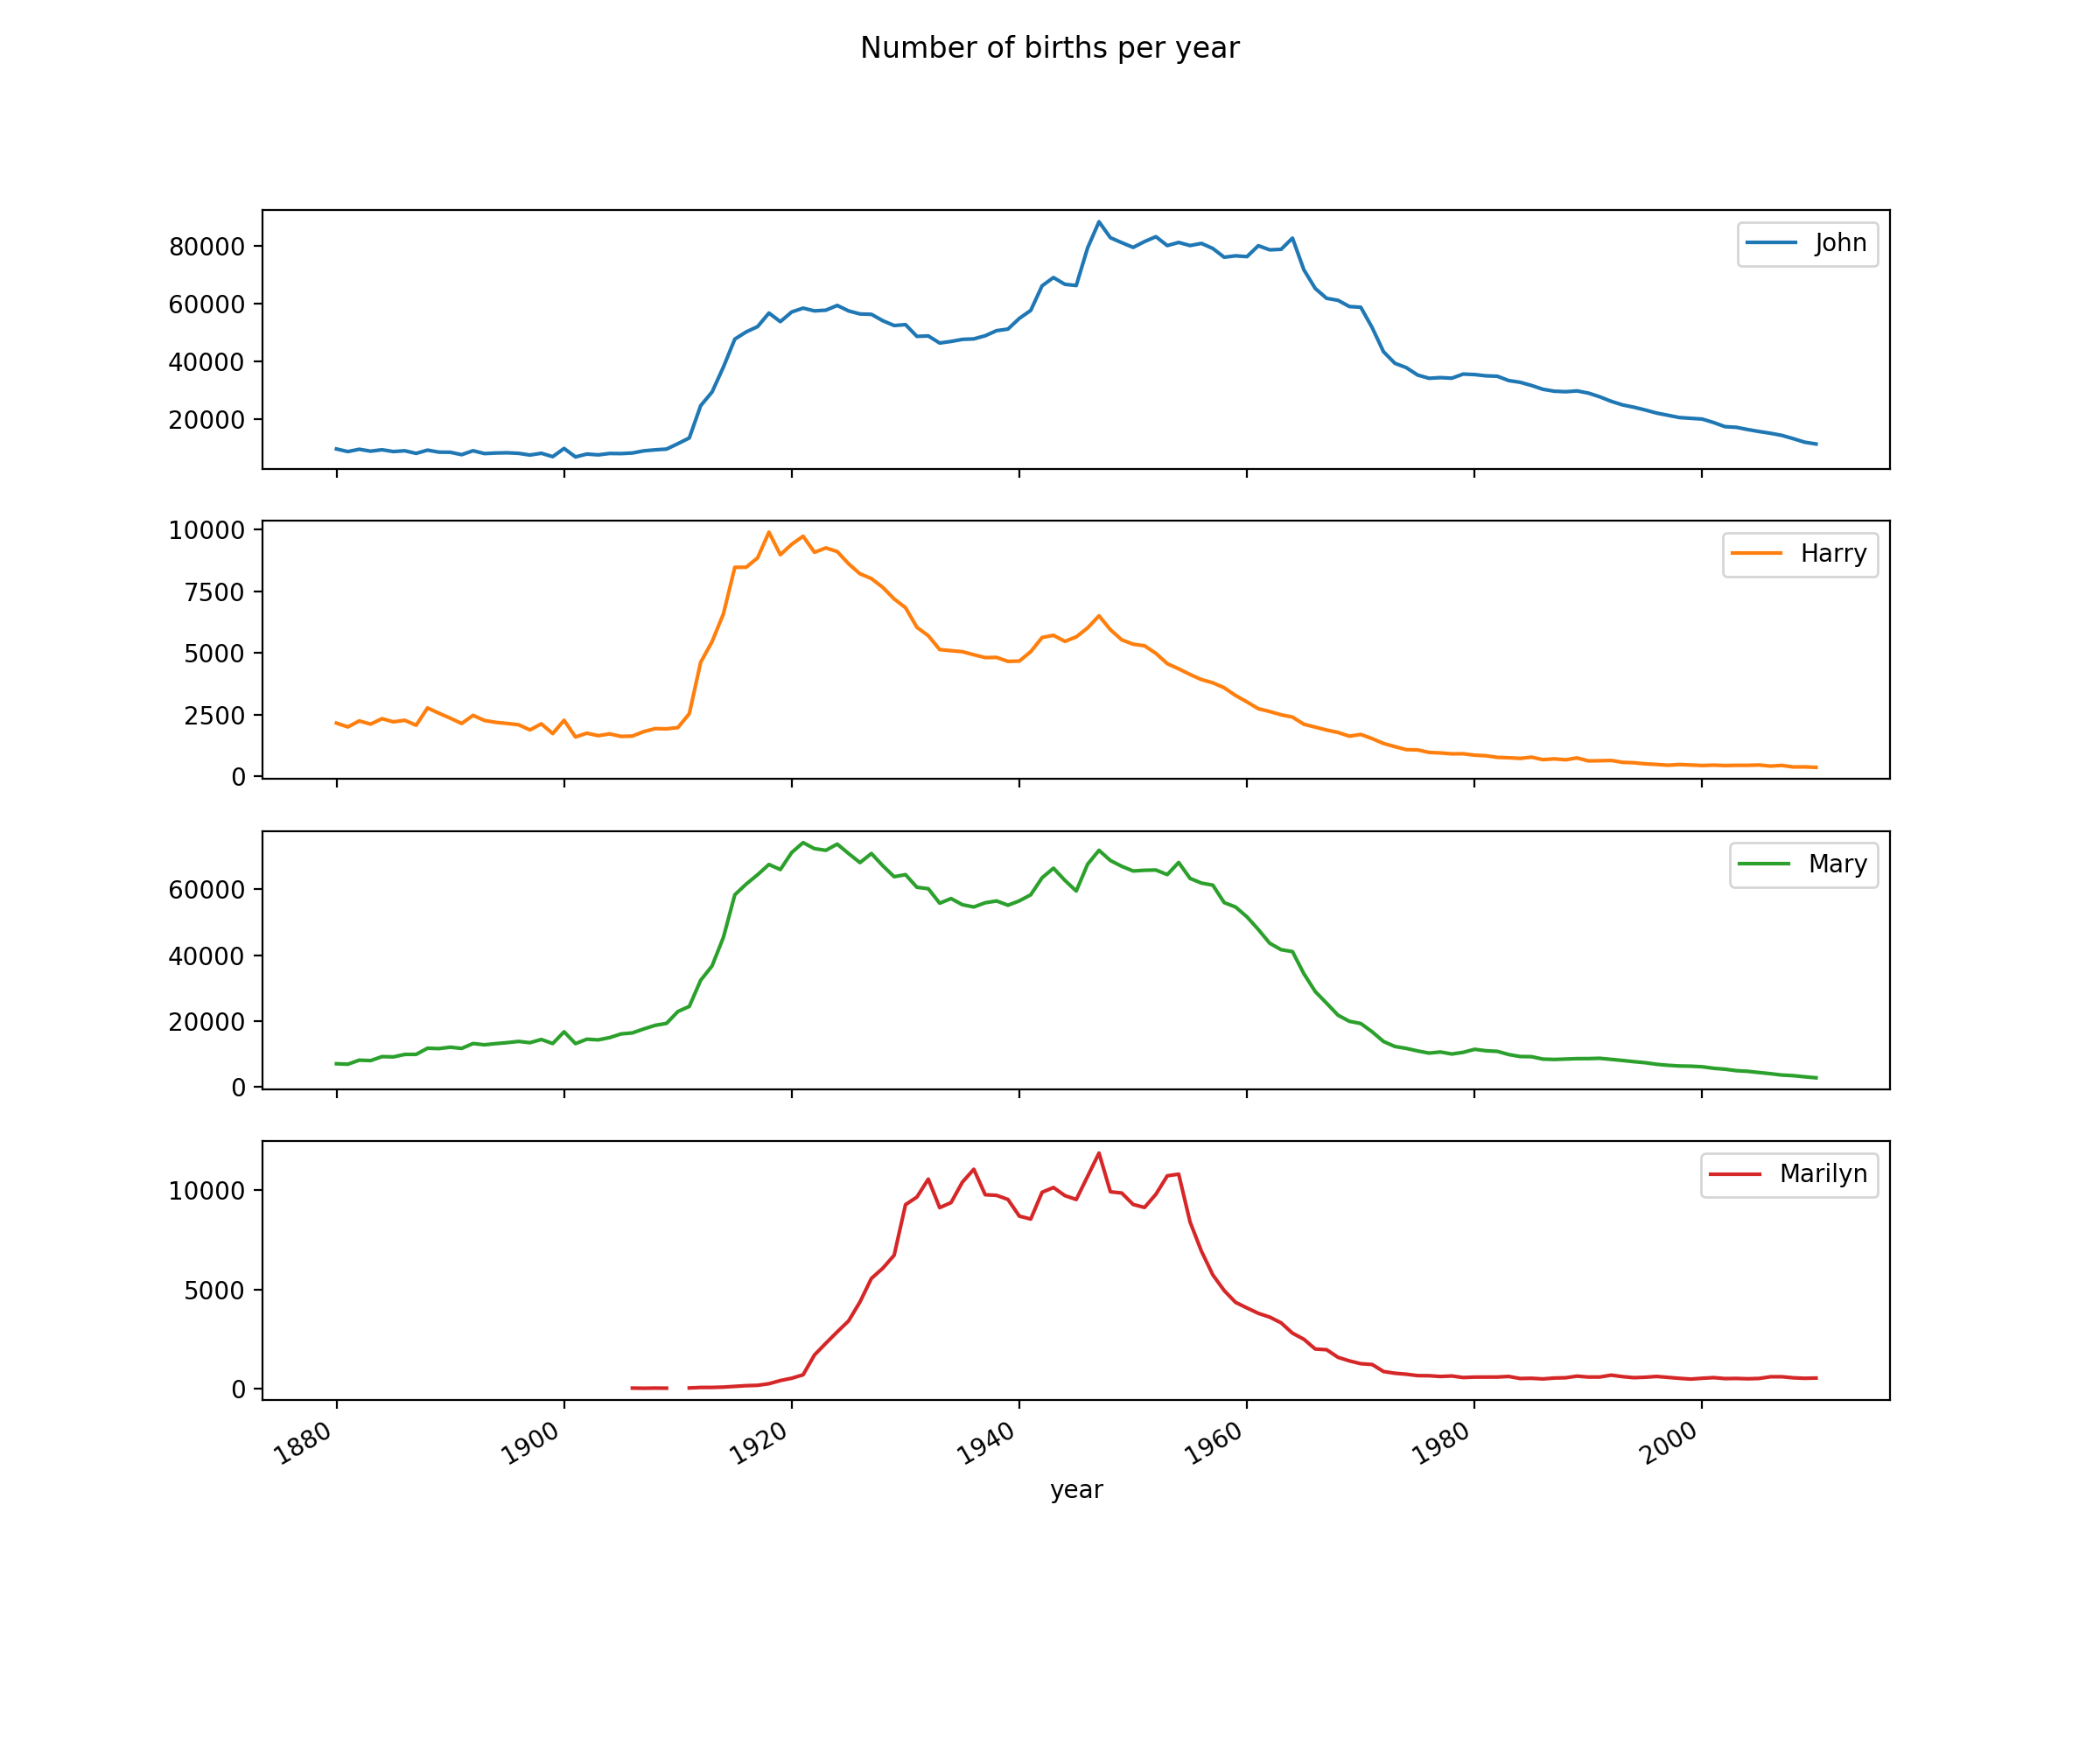

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1453e82e8>,
      dtype=object)

In [121]:
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']
total_births=top1000.pivot_table('births', index='year', columns='name', aggfunc='sum')
subset=total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of births per year')

#### Measuring the increase in naming diversity

<IPython.core.display.Javascript object>


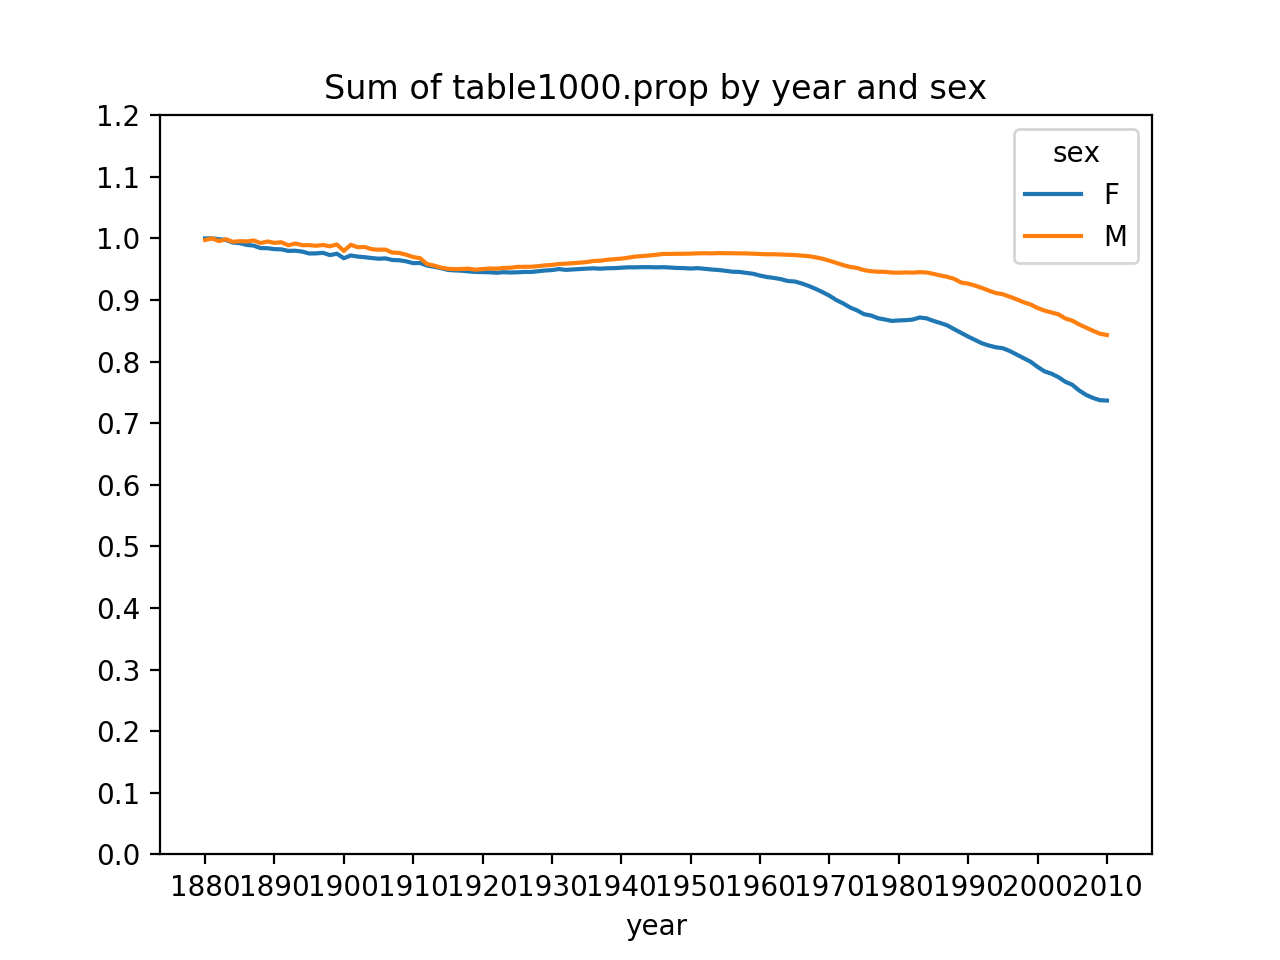

In [129]:
table=top1000.pivot_table('prop', index='year', columns='sex', aggfunc='sum')
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [133]:
# Another interesting metric is the number of distinct names
df=boys[boys.year==2010]
# we want to know how many of the most popular names it take to reach 50%
prop_cumsum=df.sort_values(by='prop', ascending=False).prop.cumsum()
# Call the method searchsorted. It returns the position in the cumulative sum at which 0.5 would
# need to be inserted to keep it in sorted order
prop_cumsum.values.searchsorted(0.5)

116

In [137]:
# apply this operation to each year/sex combination, groupby those fields, and apply a function
# returning the count for each group
def get_quantile_count(group, q=0.5):
    group=group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1
diversity=top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<IPython.core.display.Javascript object>


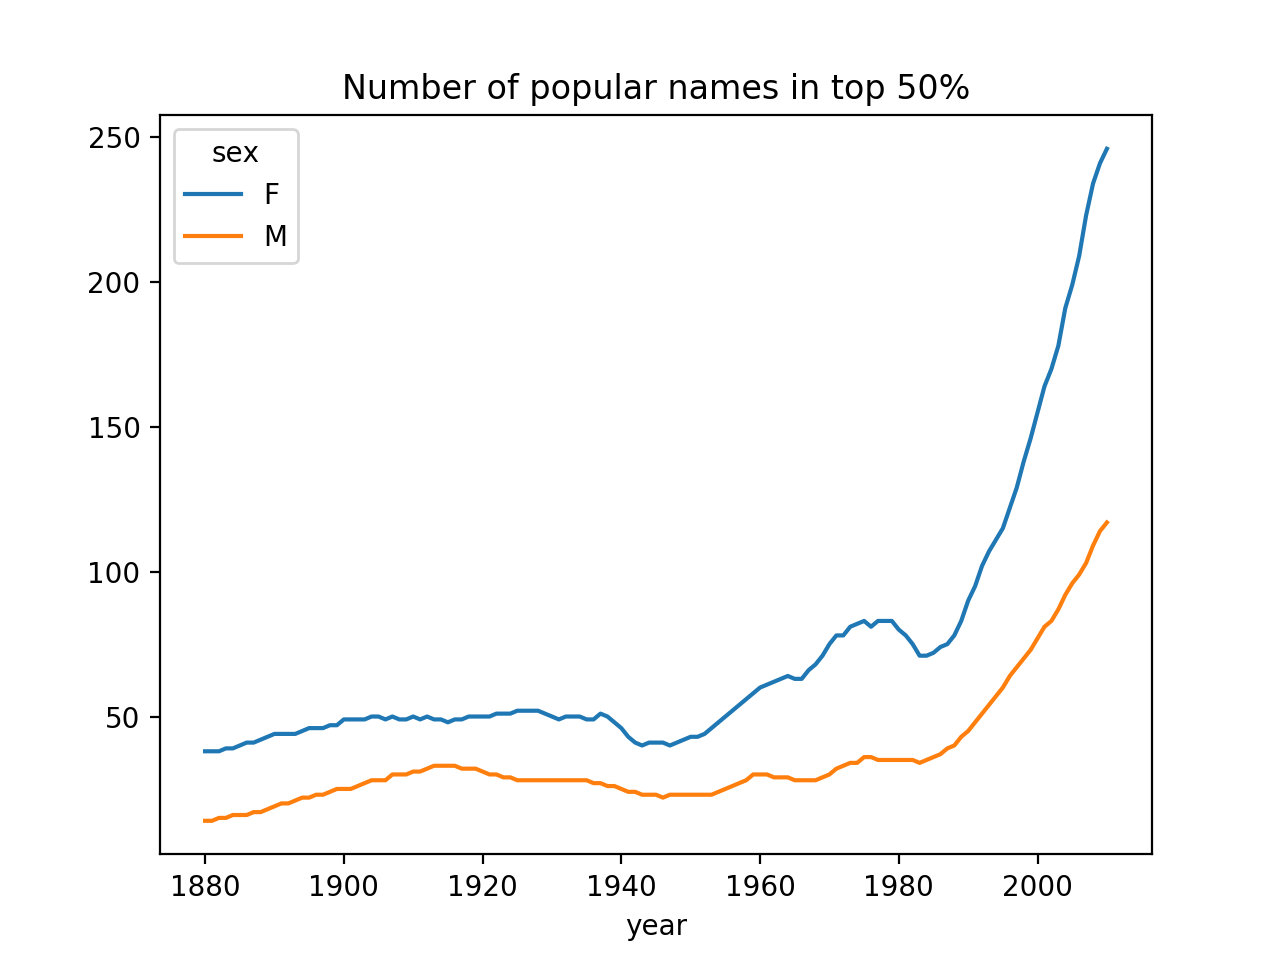

In [138]:
diversity.plot(title='Number of popular names in top 50%')

#### The "last letter" revolution

In [142]:
# extract last letter from name column
get_last_letter=lambda x: x[-1]
last_letters=names.name.map(get_last_letter)
last_letters.name='last_letter'

table=names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc='sum')
# select out three representative years spanning the history and print the first few rows
subtable=table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

<IPython.core.display.Javascript object>


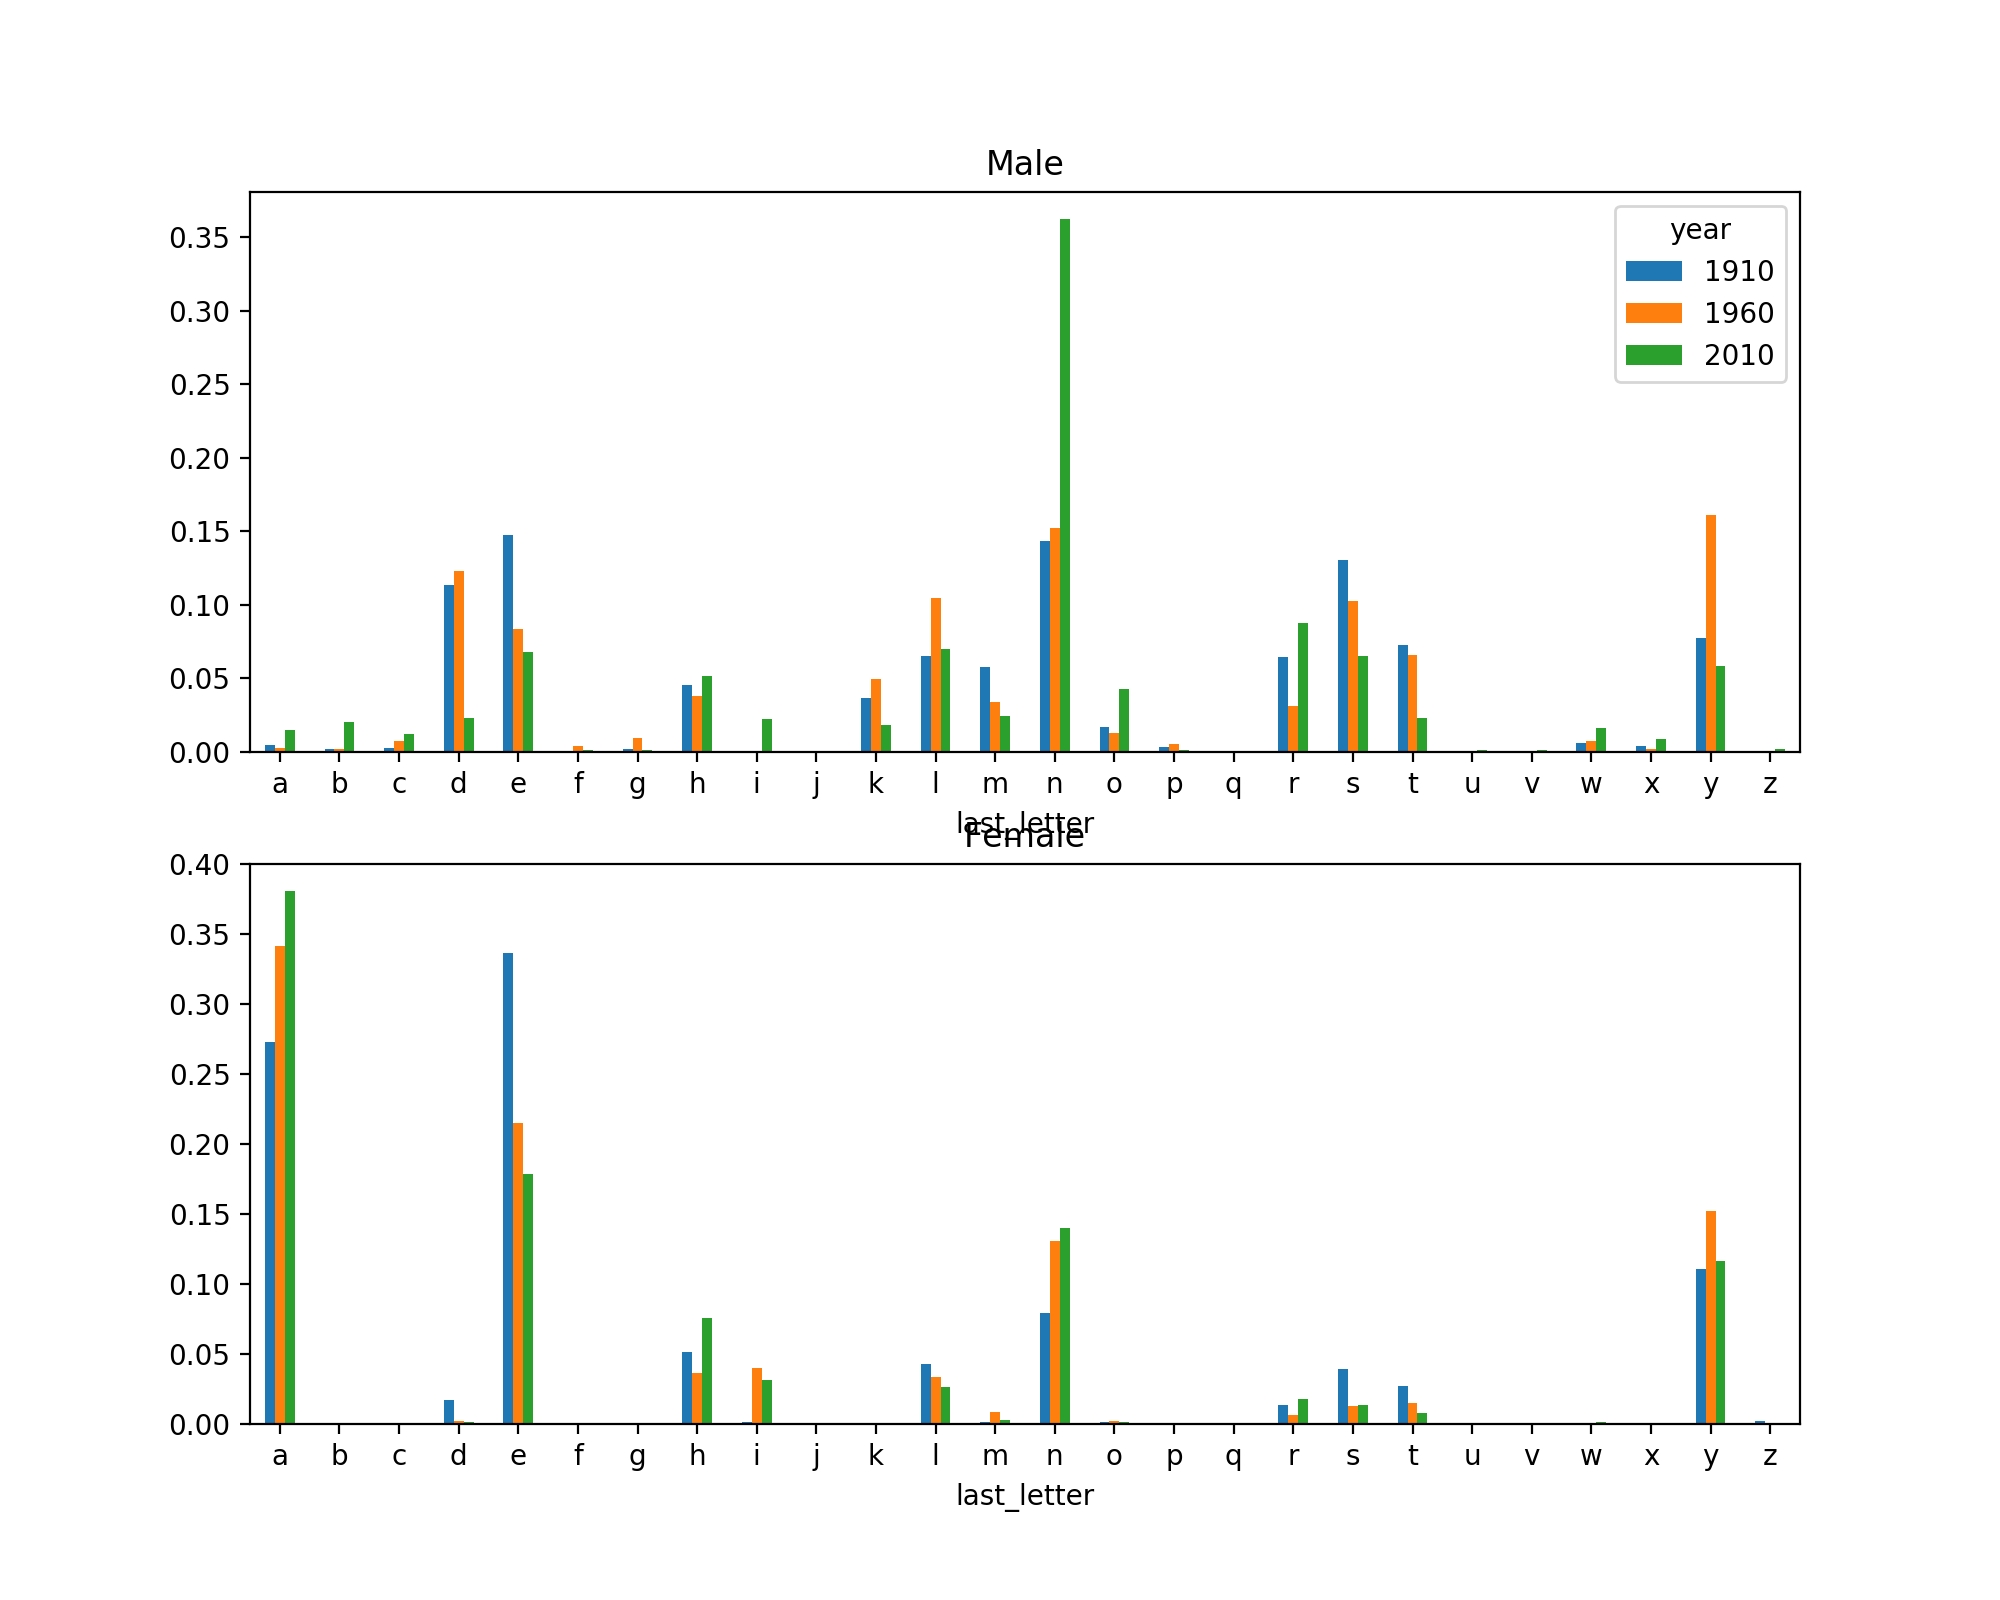

In [148]:
# normalize the table by total births to compute a new table containing proportion of total births
# for each sex ending in each letter
letter_prop=subtable/subtable.sum()
# make bar plots for each sex broken down by year
import matplotlib.pyplot as plt
fig, axes=plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [149]:
letter_prop=table/table.sum()
dny_ts=letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<IPython.core.display.Javascript object>


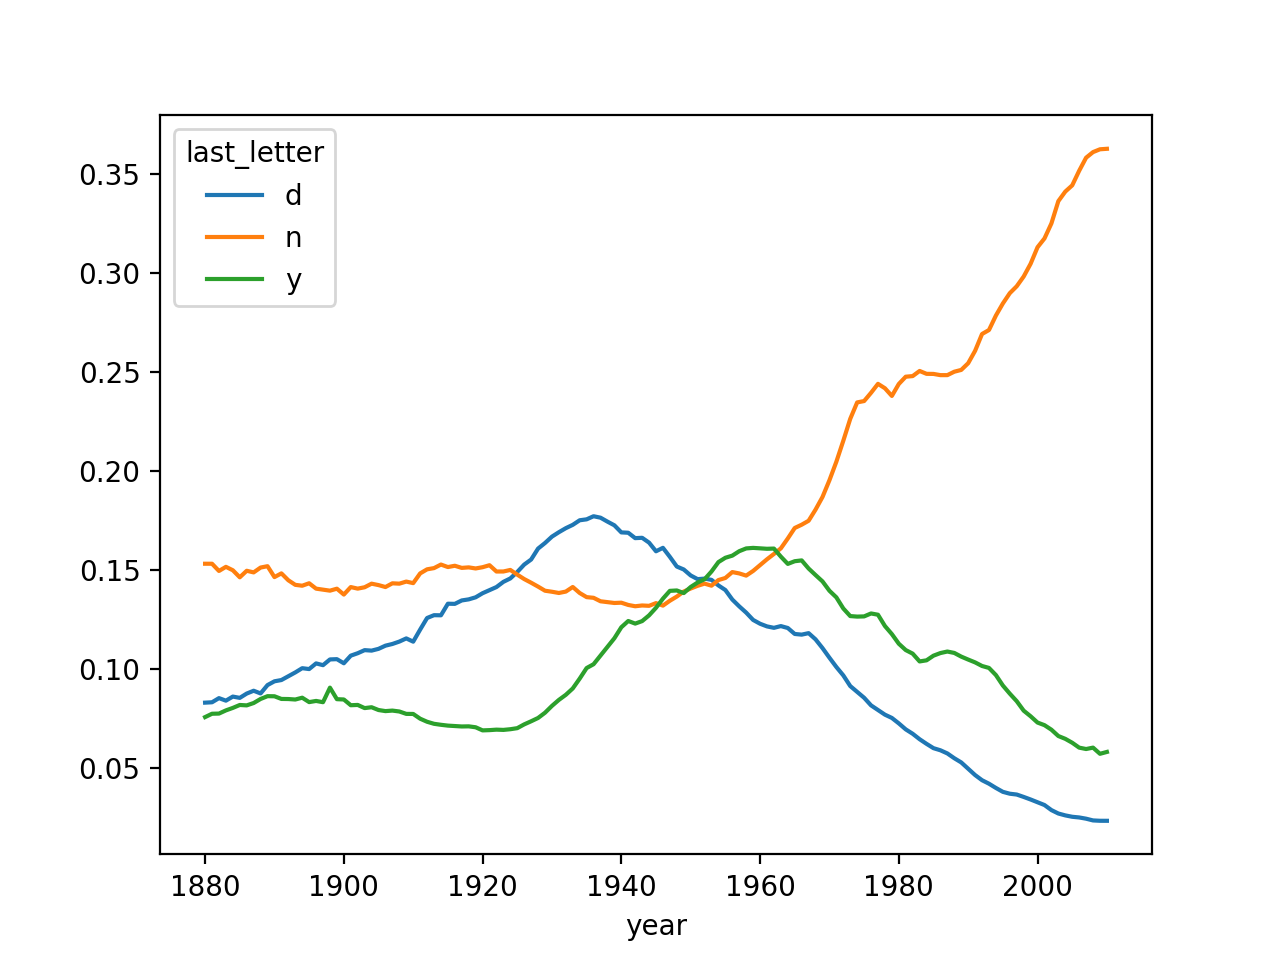

In [151]:
dny_ts.plot()

#### Boy names that become girl names (and vice versa)

In [152]:
all_names=pd.Series(top1000.name.unique())
lesley_like=all_names[ all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [153]:
filtered=top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [162]:
# let's aggregate by sex and year and normalize within year
table=filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table=table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<IPython.core.display.Javascript object>


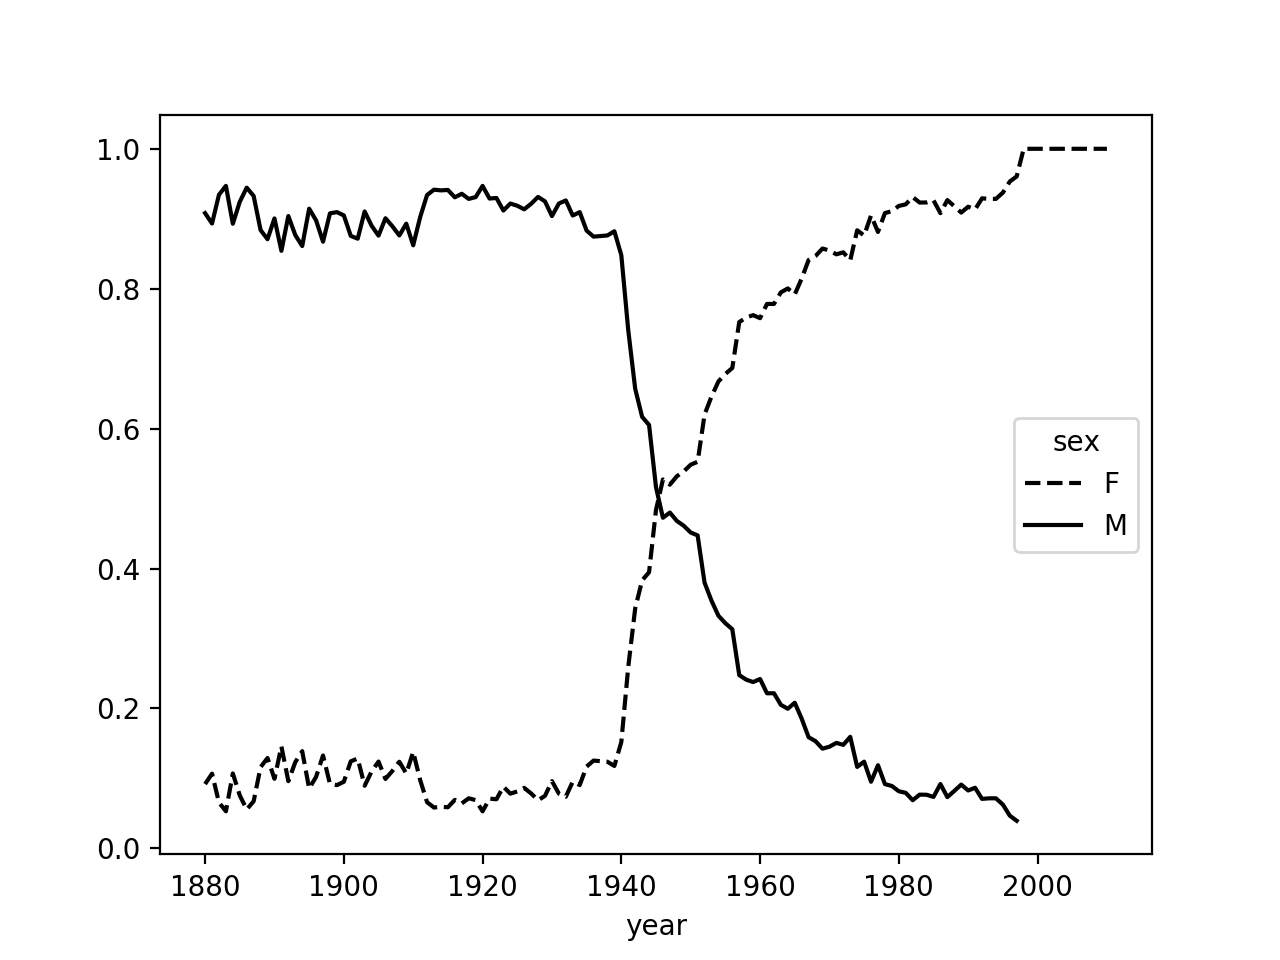

In [199]:
# make a plot of the breakdown by sex over time
table.plot(style={'M': 'k-', 'F': 'k--'})

### UDSA Food Database

In [169]:
import json
db=json.load(open('database.json'))
len(db)

6636

In [171]:
# Each entry in db is a dict containing all the data for a single food. The 'nutrients' field is a list
# of dicts, one for each nutrient
db[0].keys()
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [172]:
nutrients=pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [176]:
# When converting a list of dicts to a DataFrame, we can specify a list of fields to extract.
info_keys=['description', 'group', 'id', 'manufacturer']
info=pd.DataFrame(db, columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [191]:
# assemble the nutrients for each food into a single large table
nutrients=[]
for i in range(len(db)):
    t=pd.DataFrame(db[i]['nutrients'])
    t['id']=db[i]['id']
    nutrients.append(t)
nutrients=pd.concat(nutrients, ignore_index=True)
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
389350,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
389351,Cholesterol,Other,mg,0.000,43546
389352,"Fatty acids, total saturated",Other,g,0.072,43546
389353,"Fatty acids, total monounsaturated",Other,g,0.028,43546


In [192]:
# there are duplicates in this DataFrame, so it makes things easier to drop them
nutrients.duplicated().sum()  # number of duplicates

nutrients=nutrients.drop_duplicates()

# Since 'group' and 'description' are in both DataFrame objects, we can rename for clarity:
col_mapping={'description': 'food', 'group': 'fgroup'}
info=info.rename(columns=col_mapping, copy=False)
col_mapping={'description': 'nutrient', 'group': 'nutgroup'}
nutrients=nutrients.rename(columns=col_mapping, copy=False)

In [196]:
ndata=pd.merge(nutrients, info,on='id', how='outer')
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

<IPython.core.display.Javascript object>


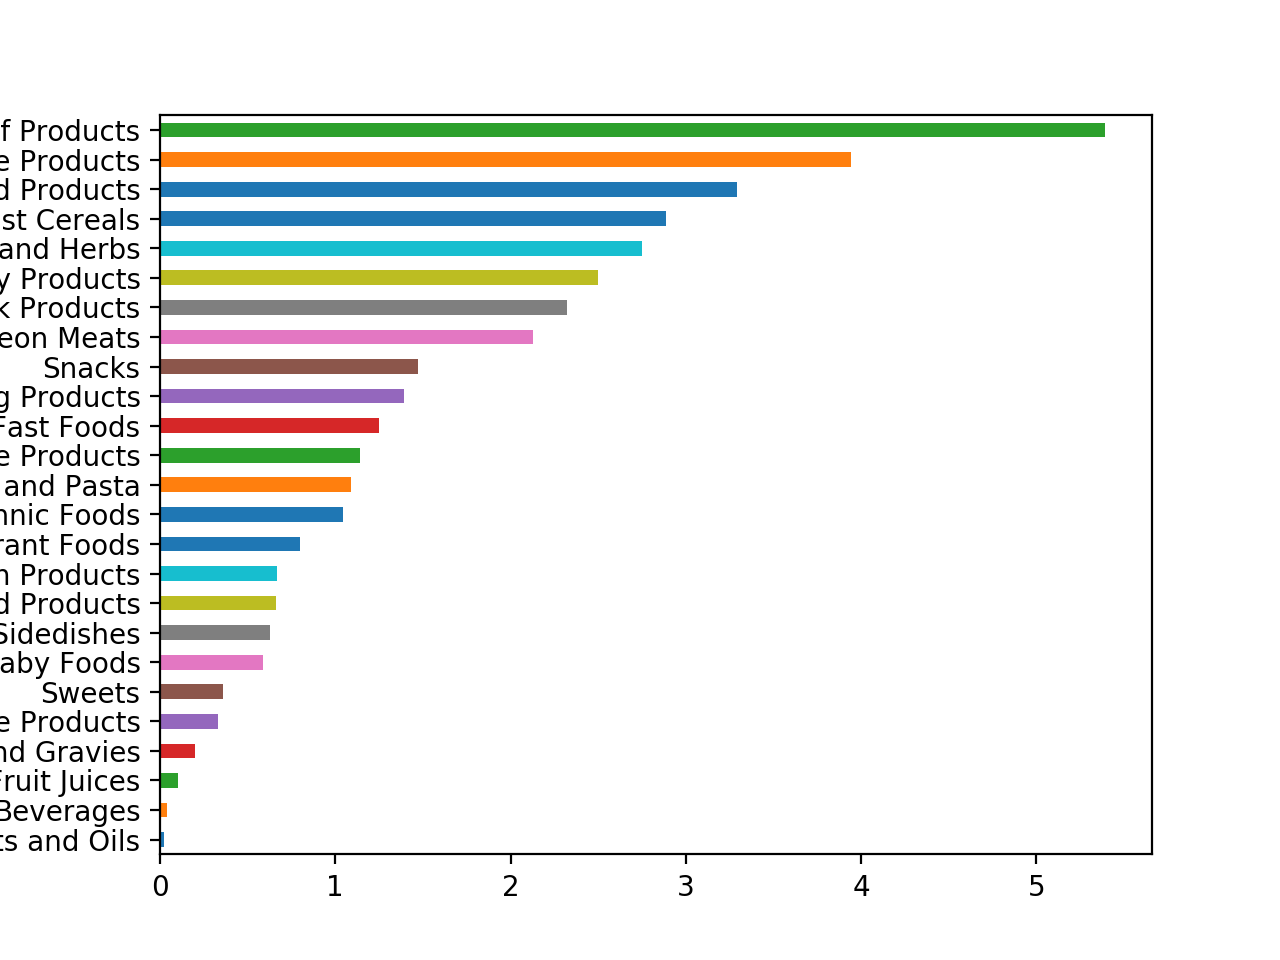

In [201]:
# make a plot of median values by food group and nutrient type
result=ndata.groupby(['nutrient', 'fgroup']).value.quantile(0.5)
figure, ax=plt.subplots(1, 1)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [217]:
# find which food is most dense in each nutrient
by_nutrient=ndata.groupby(['nutgroup', 'nutrient'])

get_maximum=lambda x: x.loc[x.value.idxmax()]
get_minimum=lambda x: x.loc[x.value.idxmin()]

max_foods=by_nutrient.apply(get_maximum)[['value', 'food']]
# make the food a little smaller
max_foods.food=max_foods.food.str[:50]
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object

### 2012 Federal Election Commission Database

In [220]:
fec=pd.read_csv('P00000001-ALL.csv')
fec.iloc[123456]

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

In [222]:
unique_cands=fec.cand_nm.unique()
parties = {'Bachmann, Michelle': 'Republican',
               'Cain, Herman': 'Republican',
               'Gingrich, Newt': 'Republican',
               'Huntsman, Jon': 'Republican',
               'Johnson, Gary Earl': 'Republican',
               'McCotter, Thaddeus G': 'Republican',
               'Obama, Barack': 'Democrat',
               'Paul, Ron': 'Republican',
               'Pawlenty, Timothy': 'Republican',
               'Perry, Rick': 'Republican',
               "Roemer, Charles E. 'Buddy' III": 'Republican',
               'Romney, Mitt': 'Republican',
               'Santorum, Rick': 'Republican'}
fec['party']=fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [223]:
# this data includes both contributions and refunds (negative contribution amount)
# To simplify the analysis, I'll restrict the dataset to positive contributions
fec=fec[fec.contb_receipt_amt>0]
# Since Barack Obama and Mitt Romney were the main two candidates, I'll also prepare a subset
# that just has contributions to their campaigns
fec_mrbo=fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

#### Donation Statistics by Occupation and Employer

In [256]:
# Note the "trick" of using dict.get to allow occupations with no mapping to "pass through"
occ_mapping = {
       'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
       'INFORMATION REQUESTED' : 'NOT PROVIDED',
       'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
       'C.E.O.': 'CEO'
}
# If no mapping provided, return x
f=lambda x: occ_mapping.get(x, x)
fec.contbr_occupation=fec.contbr_occupation.map(f)

# do the same thing for employers
emp_mapping = {
       'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
       'INFORMATION REQUESTED' : 'NOT PROVIDED',
       'SELF' : 'SELF-EMPLOYED',
       'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
f=lambda x: emp_mapping.get(x, x)
fec.contbr_employer=fec.contbr_employer.map(f)

In [257]:
by_occupation=fec.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')
over_2mm=by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
...,...,...
PRESIDENT,1878509.95,4.720924e+06
PROFESSOR,2165071.08,2.967027e+05
REAL ESTATE,528902.09,1.625902e+06


<IPython.core.display.Javascript object>


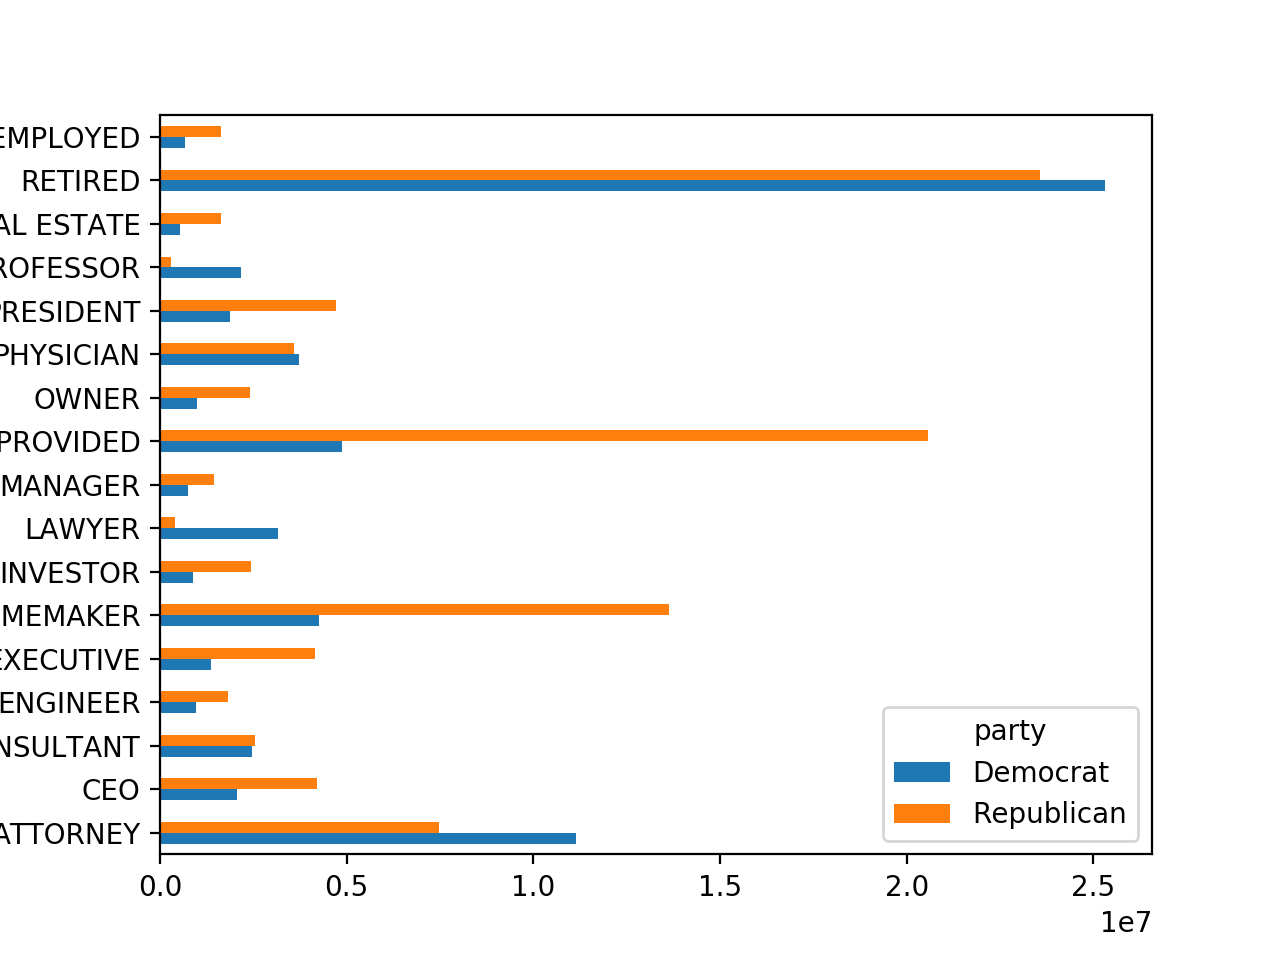

In [259]:
# It can be easier to look at this data graphically as a bar plot
over_2mm.plot(kind='barh')

In [260]:
# the top donor occupations or top companies that donated to Obama and Romney
def get_top_amounts(group, key, n=5):
    totals=group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)
grouped=fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
               HOMEMAKER                 4248875.80
               PHYSICIAN                 3735124.94
                                           ...     
Romney, Mitt   HOMEMAKER                 8147446.22
               ATTORNEY                  5364718.82
               PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

#### Bucketing Donation Amounts

In [262]:
# use the cut function to discrete the contributor amounts into buckets by contribution size
bins=np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels=pd.cut(fec_mrbo.contb_receipt_amt, bins)
# group the data for Obama and Romney by name and bin label to get a histogram by donation size
grouped=fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [268]:
# sum the contribution amounts and normalize within buckets to visualize percentage of total
# donations of each size by candidate
bucket_sums=grouped.contb_receipt_amt.sum().unstack(0)
normed_sums=bucket_sums.div(bucket_sums.sum(1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


<IPython.core.display.Javascript object>


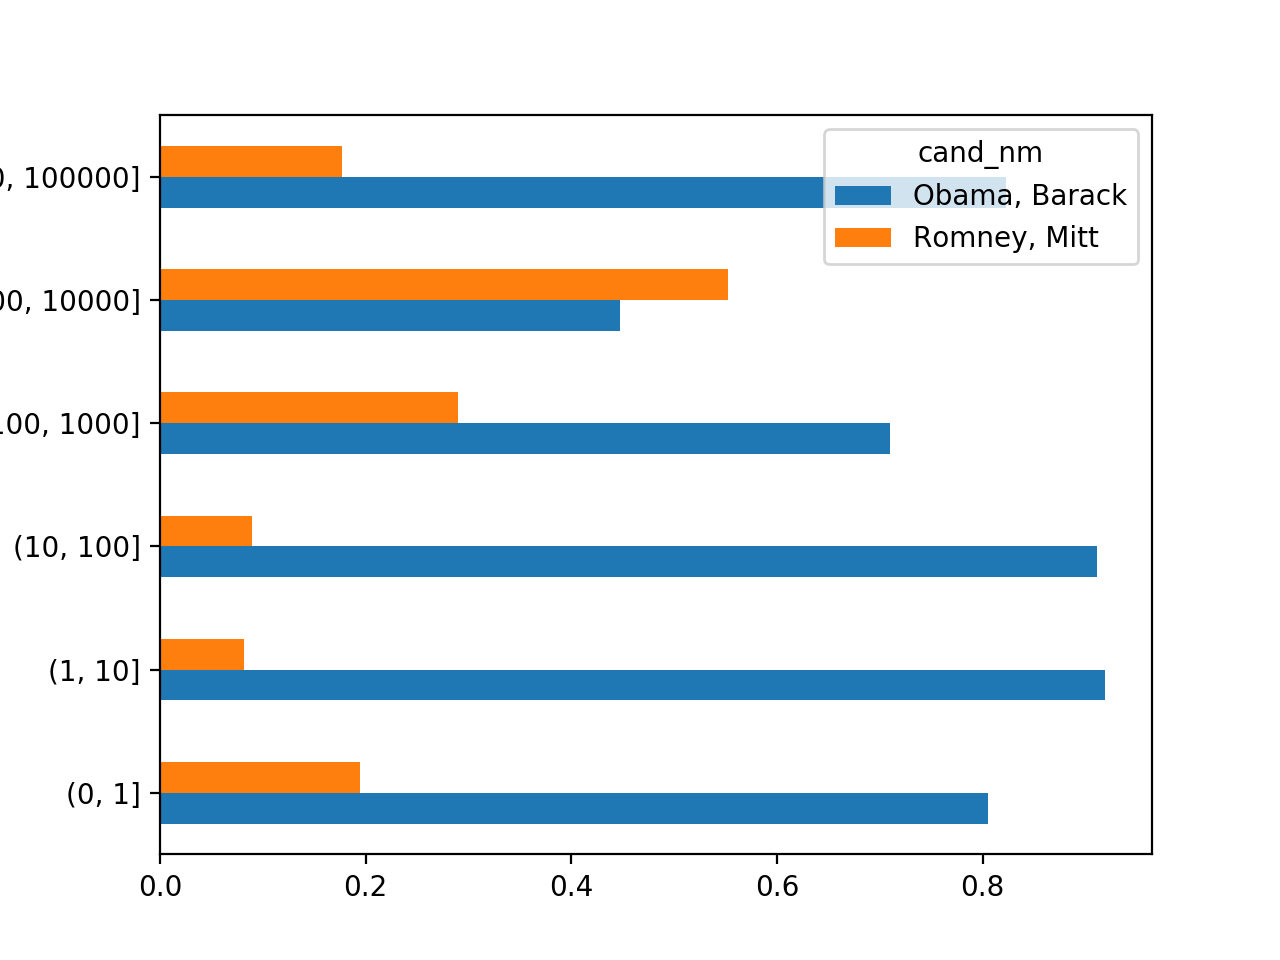

In [269]:
normed_sums[:-2].plot(kind='barh')

#### Donation Statistics by State

In [283]:
# Aggregating the data by candidate and state is a routine affair:
grouped=fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals=grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals=totals[totals.sum(1)>100000]
percent=totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


## Advanced NumPy

The ndarray internally consists of the following:

1. A pointer to data - that is, a block of data in RAM or in a memory-mapped file

2. The data type or dtype, describing fixed-size value cells in the array

3. A tuple indicating the array's shape

4. A tuple of strides, integers indicating the number of btypes to "step" in order to advance one element along a dimension

### ndarray Object Internals

In [284]:
np.ones((10, 5)).shape
np.ones((3, 4, 5), dtype=np.float64).strides

(160, 40, 8)

#### NumPy dtype Hierarchy

In [285]:
# the dtypes have superclasses such as np.integer and np.floating, which can be used in
# conjunction with the np.issubdtype function
ints=np.ones(10, dtype=np.uint16)
floats=np.ones(10, dtype=np.float32)
np.issubdtype(ints.dtype, np.integer)
np.issubdtype(floats.dtype, np.floating)

True

In [286]:
# You can see all of the parent classes of a specific dtype by calling the type's mro method
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

### Advanced Array Manipulation

#### Reshaping Arrays

In [293]:
arr=np.arange(8)
arr.reshape((4,2))
# A multidimensional array can also be reshaped
arr.reshape((4, 2)).reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [294]:
# One of the passed shape dimensions can be -1, in which case the value used for that dimension
# will be inferred from the data
arr=np.arange(15)
arr.reshape((5, -1))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [295]:
# SInce an array's shape attribute is a tuple, it can be passed to reshape
other_arr=np.ones((3, 5))
arr.reshape(other_arr.shape)

# The opposite operation of reshape from one-dimensional to a higher dimension is typically
# known as flattening or raveling
arr=np.arange(15).reshape((5, 3))
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [296]:
# ravel does not produce a copy of the underlying values if the values in the result were contiguous
# in the original array.
# The flatten method behaves like ravel except it always returns a copy of the data
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

#### C Versus Fortran Order

By default, NumPy arrays are created in *row major* order. Spatially this means that if you have a two-dimensional array of data, the items in each row of the array are stored in adjacent memory locations. The alternative to row major ordering is *column major* order, which means that values within each column of data are stored in adjacent memory locations.

Functions like *reshape* and *ravel* accept an *order* argument indicating the order to use the data in the array. This is usually set to 'C' or 'F' in most cases.

In [297]:
arr=np.arange(12).reshape((3, 4))
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [298]:
arr.ravel('F')

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

The key difference between C and Fortran order is the way in which the dimensions are walked:

1. C/row major order: Traverse higher dimensions first (e.g., axis 1 before advancing on axis 0)

2. Fortran/column major order: Traverse higher dimension last (e.g., axis 0 before advancing on axis 1).

#### Concatenating and Splitting Arrays

In [2]:
arr1=np.array([[1, 2, 3], [4, 5, 6]])
arr2=np.array([[7, 8, 9], [10, 11, 12]])

In [4]:
# numpy.concatenate takes a sequence (tuple, list, etc.) of arrays and joins them together in
# order along the input axis
np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [5]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [ ]:
# There are some convenience functions, like vstack and hstack, for common kinds of concatenation.
# The preceding operations could have been expressed as:
np.vstack((arr1, arr2))
np.hstack((arr1, arr2))

In [9]:
# split, on the other hand, slices apart an array into multiple arrays along an axis
arr=np.random.randn(5, 2)
first, second, third=np.split(arr, [1, 3])  # The value [1, 3] indicates the indices at which to split the array into pieces
second

array([[ 0.07694014,  0.32346902],
       [-1.10226884, -0.67070772]])

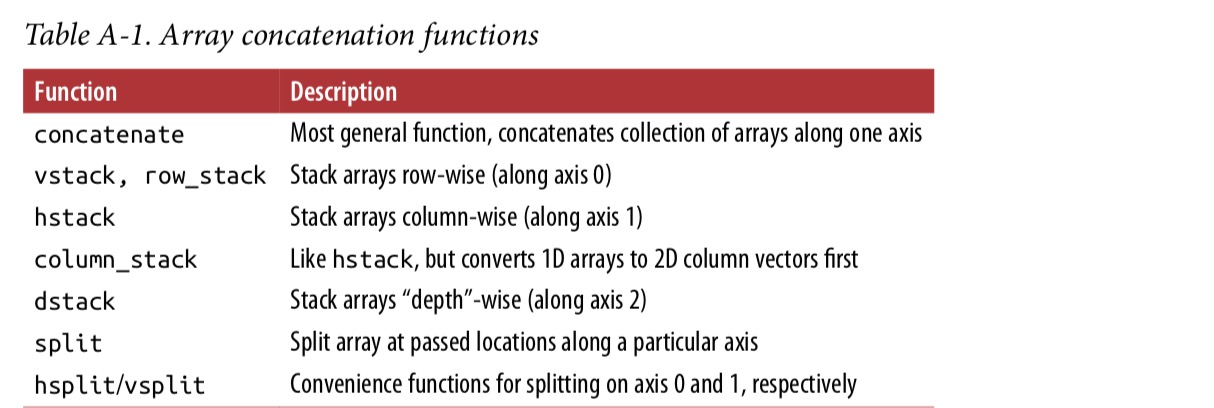

In [10]:
from IPython.display import Image
Image(filename='pictures/array_concat.jpg')

#### Stacking helpers: r_ and c_

In [12]:
arr=np.arange(6)
arr1=arr.reshape((3, 2))
arr2=np.random.randn(3, 2)
np.r_[arr1, arr2]

array([[ 0.        ,  1.        ],
       [ 2.        ,  3.        ],
       [ 4.        ,  5.        ],
       [-0.06106908, -1.75173644],
       [ 0.52613659,  0.12071658],
       [ 0.70130621, -1.33769992]])

In [13]:
np.c_[np.r_[arr1, arr2], arr]

array([[ 0.        ,  1.        ,  0.        ],
       [ 2.        ,  3.        ,  1.        ],
       [ 4.        ,  5.        ,  2.        ],
       [-0.06106908, -1.75173644,  3.        ],
       [ 0.52613659,  0.12071658,  4.        ],
       [ 0.70130621, -1.33769992,  5.        ]])

In [14]:
# These additionally can translate slices to arrays
np.c_[1:6, -10:-5]

array([[  1, -10],
       [  2,  -9],
       [  3,  -8],
       [  4,  -7],
       [  5,  -6]])

#### Repeating Elements: tile and repeat

In [15]:
# repeat replicates each element in an array some number of times, producing a larger array
arr=np.arange(3)
arr.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [16]:
arr.repeat([2, 3, 4])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

In [21]:
# Multidimensional arrays can have their elements repeated along a particular axis
arr=np.random.randn(2, 2)
arr.repeat(2, axis=0)

array([[ 0.36393354, -1.4602034 ],
       [ 0.36393354, -1.4602034 ],
       [-0.84132761,  0.08973592],
       [-0.84132761,  0.08973592]])

In [22]:
# Note that if no axis is passed, the array will be flattened first, which is likely not what you want
arr.repeat(2)

array([ 0.36393354,  0.36393354, -1.4602034 , -1.4602034 , -0.84132761,
       -0.84132761,  0.08973592,  0.08973592])

In [23]:
# You can pass an array of integers when repeating a multidimensional array
arr.repeat([2, 3], axis=1)

array([[ 0.36393354,  0.36393354, -1.4602034 , -1.4602034 , -1.4602034 ],
       [-0.84132761, -0.84132761,  0.08973592,  0.08973592,  0.08973592]])

In [25]:
# tile, on the other hand, is a shortcut for stacking copies of an array along an axis. Visually
# you can think of it as being akin to 'laying down tiles':
np.tile(arr, 2)

array([[ 0.36393354, -1.4602034 ,  0.36393354, -1.4602034 ],
       [-0.84132761,  0.08973592, -0.84132761,  0.08973592]])

In [27]:
# The second argument is the number of tiles; with a scalar, the tiling is made row by row,
# rather than column by column. The second argument to tile can be a tuple indicating the 
# layout of the 'tiling'
np.tile(arr, (3, 2))

array([[ 0.36393354, -1.4602034 ,  0.36393354, -1.4602034 ],
       [-0.84132761,  0.08973592, -0.84132761,  0.08973592],
       [ 0.36393354, -1.4602034 ,  0.36393354, -1.4602034 ],
       [-0.84132761,  0.08973592, -0.84132761,  0.08973592],
       [ 0.36393354, -1.4602034 ,  0.36393354, -1.4602034 ],
       [-0.84132761,  0.08973592, -0.84132761,  0.08973592]])

#### Fancy Indexing Equivalents: take and put

In [30]:
arr=np.arange(10)*100
inds=[7, 1, 2, 6]
arr[inds]

# There are alternative ndarray methods that are useful in the special case of only making a
# selection on a single axis
arr.take(inds)

array([700, 100, 200, 600])

In [32]:
arr.put(inds, 42)
arr.put(inds, [40, 41, 42, 43])
arr

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

In [33]:
# To use take along other axes, you can pass the axis keyword
inds=[2, 0, 2, 1]
arr=np.random.randn(2, 4)
arr.take(inds, axis=1)

array([[-0.62905172,  0.77474433, -0.62905172,  2.17684859],
       [-1.00200567,  0.92935484, -1.00200567, -1.46549905]])

*put* does not accept an *axis* argument but rather indexes into the flattened (one-dimensional, C order) version of the array. Thus, when you need to set elements using an indexing array on other axes, it is often easiest to use fancy indexing.

### Broadcasting

In [41]:
# Broadcasting describes how arithmetic works between arrays of different shapes
# For example, we can demean each column of an array
arr=np.random.randn(4, 3)
demeaned=arr-arr.mean(0)
demeaned.mean(0)

array([1.11022302e-16, 3.46944695e-17, 0.00000000e+00])

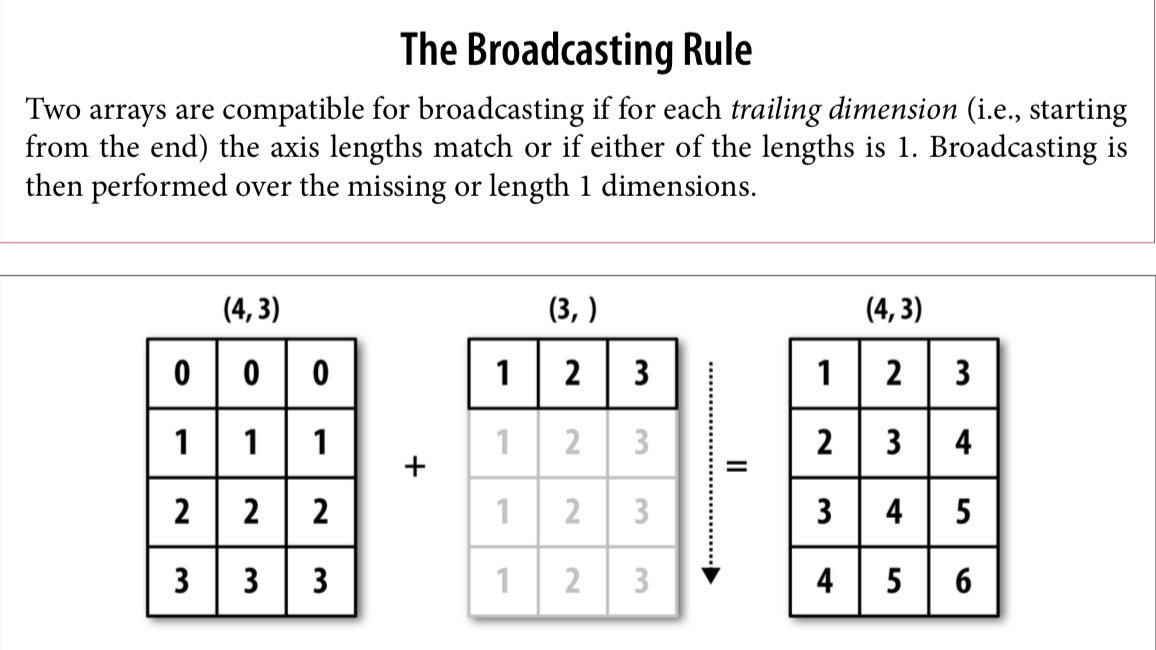

In [42]:
from IPython.display import Image
Image(filename='pictures/broadcasting_rule.jpg')

In [48]:
arr

array([[-0.41924514,  1.30179802, -0.40148631],
       [-1.92408034, -0.94275838, -2.15009115],
       [-1.92239191,  0.01373143, -1.30050666],
       [-0.11276508, -0.10607464,  1.84033859]])

In [49]:
row_means=arr.mean(1)
demeaned=arr-row_means.reshape((4, 1))
demeaned.mean(1)

array([ 0.00000000e+00, -1.48029737e-16, -7.40148683e-17,  0.00000000e+00])

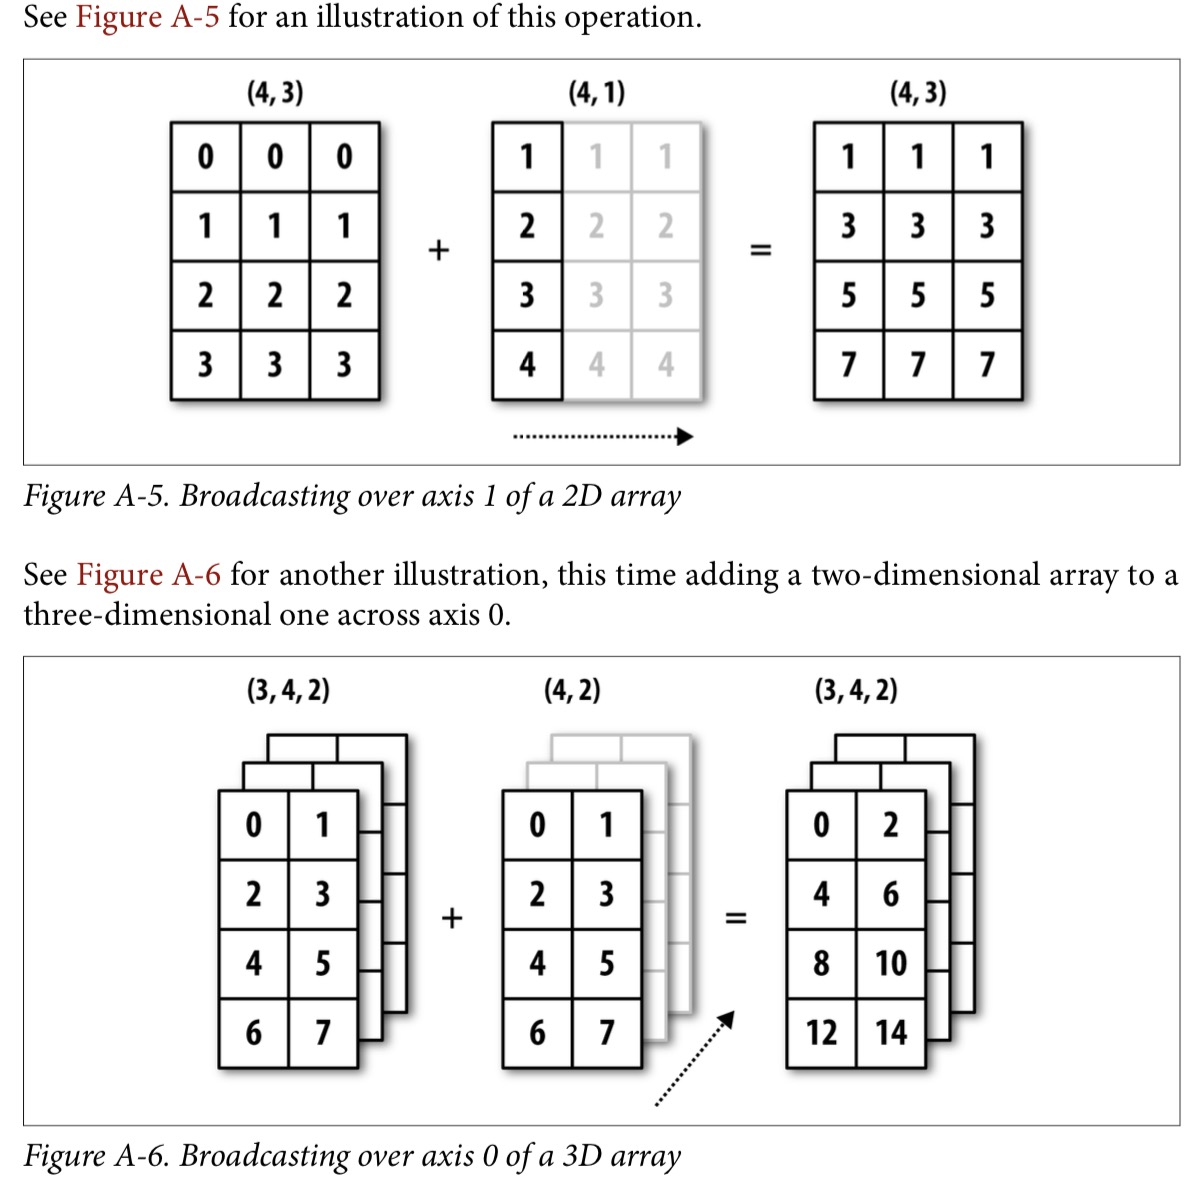

In [50]:
from IPython.display import Image
Image(filename='pictures/broadcasting.jpg')

#### Broadcasting Over Other Axes

A common problem, therefore, is needing to add a new axis with length 1 specifically for broadcasting purposes. Using *reshape* is one option, but inserting an axis requires constructing a tuple indicating the new shape. This can often be a tedious exercise. Thus, NumPy arrays offer a special syntax for inserting new axes by indexing. We use the special *np.newaxis* attribute along with "full" slices to insert the new axis

In [64]:
arr=np.zeros((4, 4))
arr_3d=arr[ : , np.newaxis , : ]
arr_3d.shape

(4, 1, 4)

In [74]:
arr_1d=np.random.normal(size=3)
arr_1d[ : , np.newaxis ]

array([[-2.12757486],
       [ 0.23961467],
       [ 1.85132839]])

In [75]:
arr_1d[ np.newaxis, : ]

array([[-2.12757486,  0.23961467,  1.85132839]])

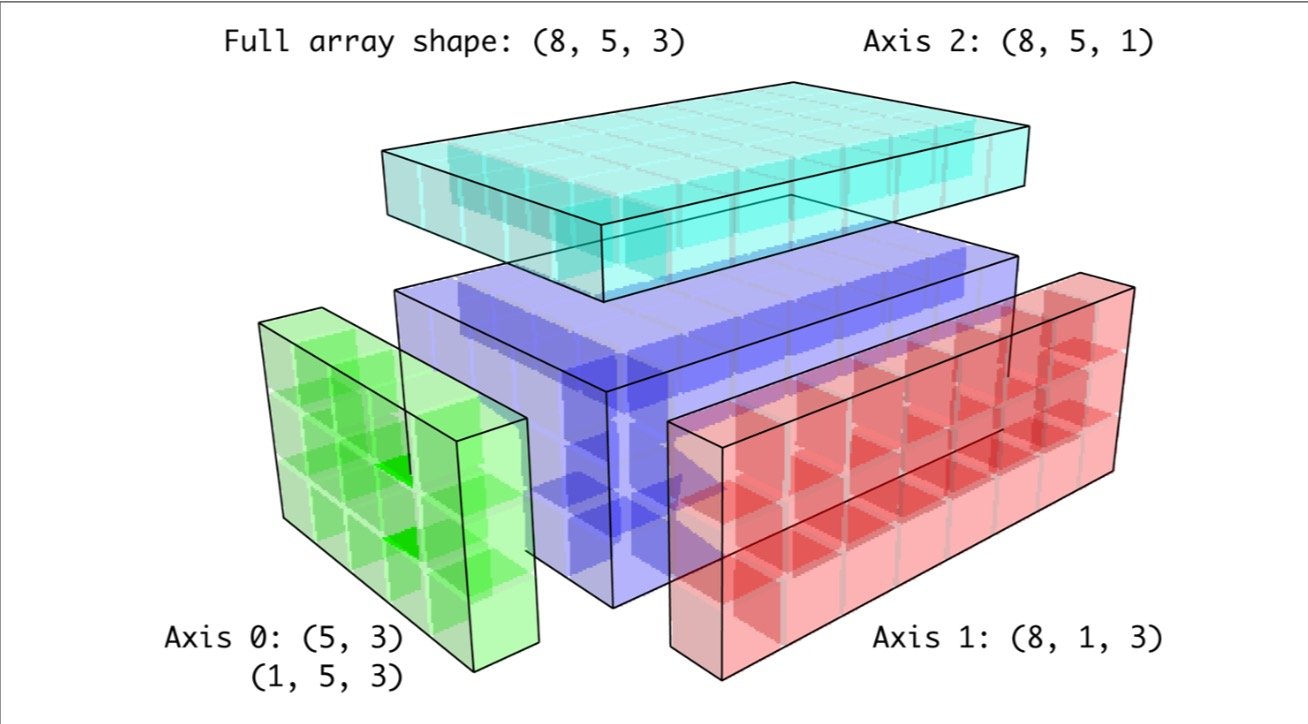

In [16]:
from IPython.display import Image
Image(filename="pictures/lalala.jpg")

In [7]:
# if we had a three-dimensional array and wanted to demean axis 2, we would only need to write
arr=np.random.randn(3, 4, 5)
depth_means=arr.mean(2)
demeaned=arr-depth_means[ : , : , np.newaxis]
demeaned.mean(2)

array([[-4.44089210e-17,  6.66133815e-17,  0.00000000e+00,
        -4.44089210e-17],
       [-6.66133815e-17,  8.88178420e-17, -2.22044605e-17,
         0.00000000e+00],
       [-2.22044605e-17,  8.88178420e-17,  8.88178420e-17,
        -1.94289029e-17]])

In [17]:
# a way to generalize demeaning over an axis without sacrificing performance
def deman_axis(arr, axis=0):
    means=arr.mean(axis)
    # This generalized things like [ : , : , np.newaxis] to N dimensions
    indexer=[slice(None)] * arr.ndim
    indexer[axis]=np.newaxis
    return arr-means[indexer]
deman_axis(arr,2).mean(2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


array([[-4.44089210e-17,  6.66133815e-17,  0.00000000e+00,
        -4.44089210e-17],
       [-6.66133815e-17,  8.88178420e-17, -2.22044605e-17,
         0.00000000e+00],
       [-2.22044605e-17,  8.88178420e-17,  8.88178420e-17,
        -1.94289029e-17]])

#### Setting Array Values by Broadcasting

In [23]:
arr=np.zeros((4, 3))
arr[:]=5
arr

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [28]:
col=np.array([1.28, -0.42, 0.44, 1.6])
arr[:]=col[ : , np.newaxis ]
arr

array([[ 1.28,  1.28,  1.28],
       [-0.42, -0.42, -0.42],
       [ 0.44,  0.44,  0.44],
       [ 1.6 ,  1.6 ,  1.6 ]])

In [29]:
arr[:2]=[[-1.37], [0.509]]
arr

array([[-1.37 , -1.37 , -1.37 ],
       [ 0.509,  0.509,  0.509],
       [ 0.44 ,  0.44 ,  0.44 ],
       [ 1.6  ,  1.6  ,  1.6  ]])

#### Advanced ufunc Usage
##### ufunc Instance Methods

In [30]:
# reduce takes a single array and aggregates its value, optionally along an axis, by performing
# a sequence of binary operations.
arr=np.arange(10)
np.add.reduce(arr)

45

In [33]:
# use np.logical_and to check whether the values in each row of an array are sorted
arr=np.random.randn(5, 5)
arr[::2].sort(1)  # sort a few rows
arr[:,:-1]<arr[:,1:]

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True,  True,  True],
       [False,  True, False,  True],
       [ True,  True,  True,  True]])

In [37]:
np.logical_and.reduce(arr[:,:-1]<arr[:,1:], axis=1)
# Of course, logical_and.reduce is equivalent to the all method

array([ True, False,  True, False,  True])

In [39]:
# accumulate is related to reduce like cumsum is related to sum. It produces an array of the
# same size with the intermediate "accumulated" values:
arr=np.arange(15).reshape((3, 5))
np.add.accumulate(arr, axis=1)

array([[ 0,  1,  3,  6, 10],
       [ 5, 11, 18, 26, 35],
       [10, 21, 33, 46, 60]])

In [42]:
# outer performs a pairwise cross-product between two arrays:
arr=np.arange(3).repeat([1, 2, 2])
np.multiply.outer(arr, np.arange(5))

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8],
       [0, 2, 4, 6, 8]])

Let M=A.ndim, N=B.ndim. Then the result, C of op.outer(A, B) is an array of dimension M+N such that:
$C[i_0, ..., i_{M-1}, j_0, ..., j_{N-1}] = op(A[i_0, ..., i_{M-1}], B[j_0, ..., j_{N-1}])$

In [51]:
np.subtract.outer(np.arange(12).reshape((3,4)), np.arange(5))

array([[[ 0, -1, -2, -3, -4],
        [ 1,  0, -1, -2, -3],
        [ 2,  1,  0, -1, -2],
        [ 3,  2,  1,  0, -1]],

       [[ 4,  3,  2,  1,  0],
        [ 5,  4,  3,  2,  1],
        [ 6,  5,  4,  3,  2],
        [ 7,  6,  5,  4,  3]],

       [[ 8,  7,  6,  5,  4],
        [ 9,  8,  7,  6,  5],
        [10,  9,  8,  7,  6],
        [11, 10,  9,  8,  7]]])

In [56]:
# The last method, reduceat, performs a 'local reduce', in essence an array groupby operation
# i which slices of the array are aggregated together.
arr=np.arange(10)
np.add.reduceat(arr, [0, 5, 8])

array([10, 18, 17])

In [57]:
# pass an axis argument
arr=np.multiply.outer(np.arange(4), np.arange(5))
np.add.reduceat(arr, [0, 2, 4], axis=1)

array([[ 0,  0,  0],
       [ 1,  5,  4],
       [ 2, 10,  8],
       [ 3, 15, 12]])

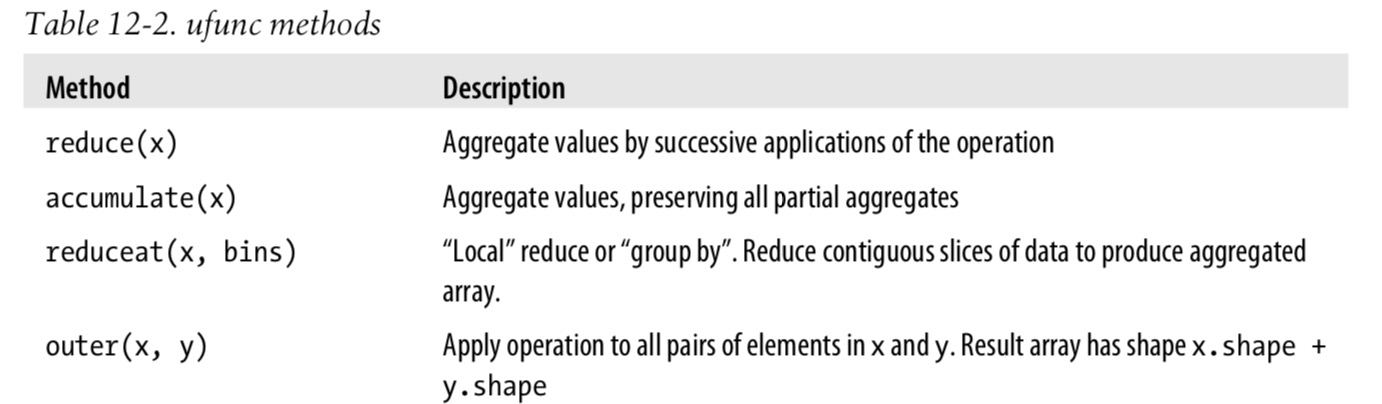

In [58]:
Image(filename='pictures/ufunc.jpg')

##### Custom ufuncs

In [59]:
# numpy.frompyfunc accepts a Python function along with a specification for the number of 
# inputs and outputs.
def add_elements(x, y):
    return x+y
add_them=np.frompyfunc(add_elements, 2, 1)
add_them(np.arange(8), np.arange(8))

array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object)

Functions created using *frompyfunc* always return arrays of Python objects which isn't very convenient. Fortunately, there is an alternate, but slightly less featureful function *numpy.vectorize* that is a bit more intelligent about type inference:

In [60]:
add_them=np.vectorize(add_elements, otypes=[np.float64])
add_them(np.arange(8), np.arange(8))

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.])

#### Structured and Record Arrays

In [61]:
dtype=[('x', np.float64), ('y', np.int32)]
sarr=np.array([(1.5, 6), (np.pi, -2)], dtype=dtype)
sarr

array([(1.5       ,  6), (3.14159265, -2)],
      dtype=[('x', '<f8'), ('y', '<i4')])

In [62]:
sarr[0]

(1.5, 6)

In [63]:
sarr[0]['y']

6

In [64]:
sarr['x']

array([1.5       , 3.14159265])

#### Nested dtypes and Multidimensional Fields

In [66]:
# When specifying a structured dtype, you can additionally pass a shape (as an int or tuple)
dtype=[('x', np.int64, 3), ('y', np.int32)]
arr=np.zeros(4, dtype=dtype)
arr

array([([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0)],
      dtype=[('x', '<i8', (3,)), ('y', '<i4')])

In [67]:
arr[0]['x']
arr['x']

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [68]:
# Since dtypes can be arbitrarily complex, why not nested dtypes?
dtype=[ ('x', [('a', 'f8'), ('b', 'f4')]), ('y', np.int32)]
data=np.array([((1, 2), 5), ((3, 4), 6)], dtype=dtype)
data['x']

array([(1., 2.), (3., 4.)], dtype=[('a', '<f8'), ('b', '<f4')])

In [69]:
data['x']['a']

array([1., 3.])

### More About Sorting

In [81]:
# the ndarray sort instance method is an in-place sort
# When sorting arrays in-place, remember that if the arrya is a view on a different ndarray, the 
# original array will be modified:
arr=np.random.randn(3, 5)
arr[:, 0].sort()    # Sort first column values in-place
arr

array([[-1.27014362, -0.5684781 ,  1.03922099, -0.47435284, -1.24059777],
       [-0.32299601,  1.27581071, -1.21332667, -1.79079779, -1.37413641],
       [ 0.57376318, -1.6787613 , -0.9393516 , -1.72508351,  0.27939317]])

In [83]:
# On the other hand, numpy.sort creates a new, sorted copy of an array
arr=np.random.randn(5)
np.sort(arr)

arr=np.random.randn(3, 5)
arr.sort(axis=1)

# none of the sort methods have an option to sort in descending order
# values[::-1] returns a list in reverse order
arr[::-1]

array([[-1.03958003, -0.44423035,  1.01270025,  1.05767189,  1.2780333 ],
       [-1.2765168 , -1.16042154, -0.98589723,  0.21859534,  0.31342381],
       [-0.46813307, -0.24419898,  0.32902367,  0.52706496,  1.36903498]])

#### Indirect Sorts: argsort and lexsort

In [86]:
values=np.array([5, 0, 1, 3, 2])
indexer=values.argsort()
values[indexer]

array([0, 1, 2, 3, 5])

In [87]:
# As a less trivial example, this code reorders a 2D array by its first row
arr=np.random.randn(3, 5)
arr[0]=values
arr[ : , arr[0].argsort() ]

array([[ 5.        ,  0.        ,  1.        ,  3.        ,  2.        ],
       [-0.53466383, -1.05986523, -0.82578755, -0.26906043, -0.25771212],
       [ 0.013719  ,  0.15470008,  0.02955672, -1.18549562,  0.12988347]])

*lexsort* is similar to argsort, but it performs an indirect *lexicographical* sort on multiple key arrays. Suppose we wanted to sort some data identified by first and last names:

In [97]:
first_name=np.array(['Bob', 'Jane', 'Steve', 'Bill', 'Barbara'])
last_name=np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])
sorter=np.lexsort((first_name, last_name))
list(zip(last_name[sorter], first_name[sorter]))

[('Arnold', 'Jane'),
 ('Arnold', 'Steve'),
 ('Jones', 'Bill'),
 ('Jones', 'Bob'),
 ('Walters', 'Barbara')]

#### Alternate Sort Algorithms

In [103]:
# A stable sorting algorithm preserves the relative position of equal elements
# This can be especially important in indirect sorts where the relative ordering is meaningful
values = np.array(['2:first', '2:second', '1:first', '1:second', '1:third'])
key=np.array([2, 2, 1, 1, 1])
indexer=key.argsort(kind='mergesort')
values.take(indexer)

array(['1:first', '1:second', '1:third', '2:first', '2:second'],
      dtype='<U8')

#### numpy.searchsorted: Finding elements in a Sorted Array

*searchsorted* is an array method that performs a binary search on a sorted array, returning the location in the array where the value would need to be inserted to maintain sortedness.

In [106]:
arr=np.array([0, 1, 7, 12, 15])
arr.searchsorted(9)

3

In [107]:
# As you might expect, you can also pass an array of values to get an array of indices back
arr.searchsorted([0, 8, 11, 16])

array([0, 3, 3, 5])

You might have noticed that searchsorted returned 0 for the 0 element. This is because the default behavior is to return the index at the left side of a group of equal values

In [108]:
arr=np.array([0, 0, 0, 1, 1, 1, 1])
arr.searchsorted([0, 1], side='right')

array([3, 7])

As another application of searchsorted, suppose we had an array of values between 0 and 10000) and a separate array of "bucket edges" that we wanted to use to bin the data:

In [112]:
data=np.floor(np.random.uniform(0, 10000, size=50))
bins=np.array([0, 100, 1000, 5000, 10000])
# To then get a labeling of which interval each data point belongs to, we can simply use searchsorted
labels=bins.searchsorted(data)
labels

array([4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 2, 4, 3, 4, 3, 3, 3, 3, 2,
       4, 3, 4, 4, 4, 1, 4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 2, 4, 4, 3, 4, 4,
       4, 2, 3, 4, 4, 3])

In [113]:
# This, combined with pandas's groupby, can be used to easily to bin data
pd.Series(data).groupby(labels).mean()

1      31.000000
2     557.800000
3    3007.619048
4    7738.130435
dtype: float64

In [119]:
# Note that NumPy actually has a function digitize that computes this bin labeling:
np.digitize(data, bins)

array([4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 2, 4, 3, 4, 3, 3, 3, 3, 2,
       4, 3, 4, 4, 4, 1, 4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 2, 4, 4, 3, 4, 4,
       4, 2, 3, 4, 4, 3])

### NumPy Matrix Class

In [121]:
X=np.random.randn(4, 4)
X[:, 0]    # one-dimensional
y=X[:, :1]   # two-dimensional by slicing
np.dot(y.T, np.dot(X, y))

array([[-6.39382177]])

To aid in writing code with a lot of matrix operations, NumPy has a *matrix* class which has modified indexing behavior to make it moer MATLAB-like: single rows and columns come back two-dimensional and multiplication with * is matrix multiplication. The above operation with *numpy.matrix* would look like:

In [122]:
Xm=np.matrix(X)
ym=Xm[:, 0]
ym

matrix([[-0.32913453],
        [ 2.04061808],
        [-1.12224429],
        [ 0.28783033]])

In [124]:
ym.T * Xm * ym

matrix([[-6.39382177]])

In [125]:
# matrix also has a special attribute I which returns the matrix inverse
Xm.I * X

matrix([[ 1.00000000e+00,  1.11022302e-16,  0.00000000e+00,
         -1.11022302e-16],
        [-1.11022302e-16,  1.00000000e+00, -3.12250226e-17,
         -3.33066907e-16],
        [-8.88178420e-16,  1.11022302e-15,  1.00000000e+00,
         -8.88178420e-16],
        [-1.38777878e-17,  0.00000000e+00, -3.46944695e-18,
          1.00000000e+00]])

I do not recommend using *numpy.matrix* as a replacement for regular ndarrays because they are generally more seldom used. In individual functions with lots of linear algebra, it may be helpful to convert the function argument to *matrix*, then cast back to regular arrays with *np.asarray* (which does not copy any data) before returning them.

### Advanced Array Input and Output
.......